In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data',names=['age','workclass','fnlwgt',
                'education','education-num','marital-status','occupation','relationship',
                'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'])

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# lets check data type of columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [12]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# lets have some insight of data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# To  find missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
# No  Null values in the data
df.shape

(32561, 15)

In [17]:
# Lets check correlation
# features in light colors are more correlated
dfcorr=df.corr()
dfcorr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


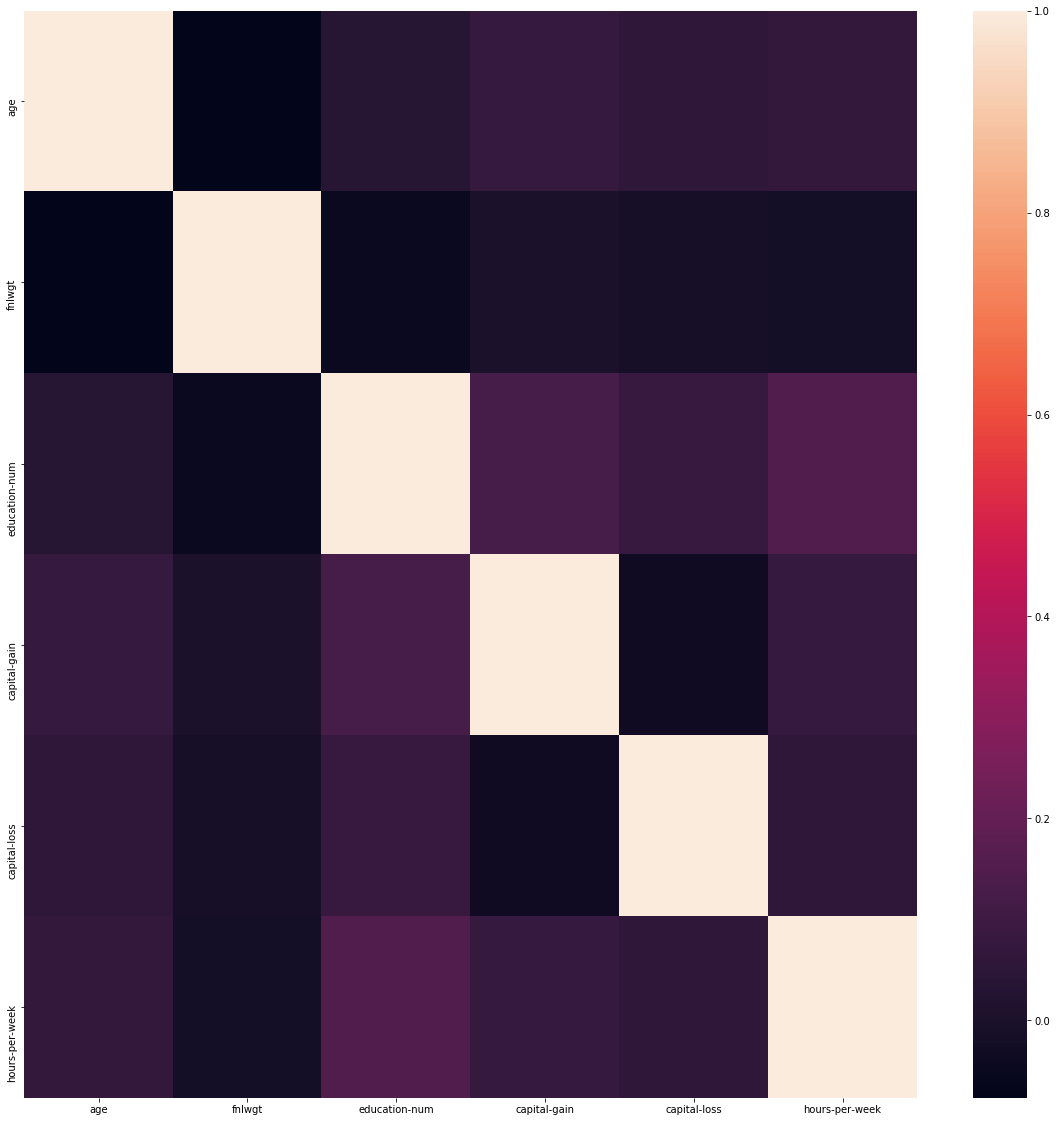

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcorr)


In [41]:
#  majorities of data are poorly coorelated with each other

In [19]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [20]:
# Univariate analysis- distribution of income
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

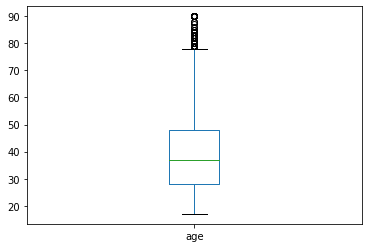

In [21]:
# univarite analysis
df['age'].plot.box()

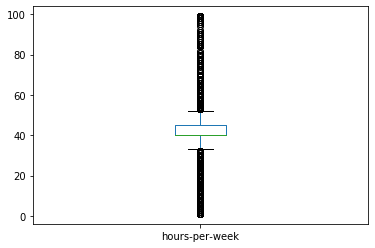

In [22]:
df['hours-per-week'].plot.box()

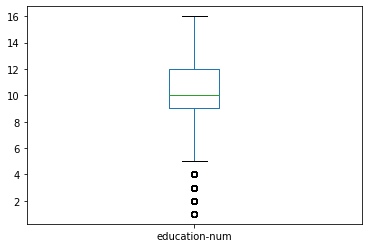

In [23]:
df['education-num'].plot.box()

In [25]:
# Looks no outliers present


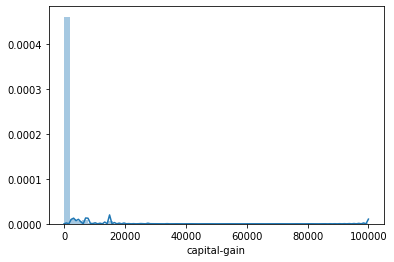

In [27]:
sns.distplot(df['capital-gain'])

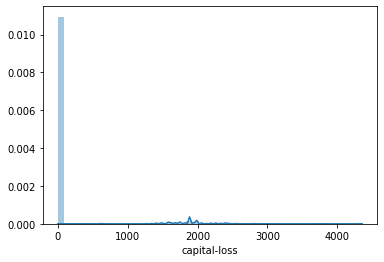

In [31]:
sns.distplot(df['capital-loss'])

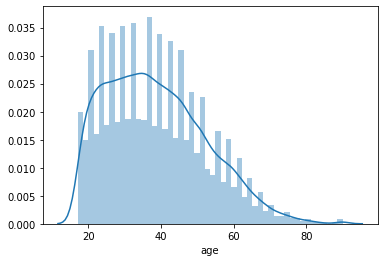

In [32]:
sns.distplot(df['age'])

In [ ]:
# majority of people are between 20 to 45 years

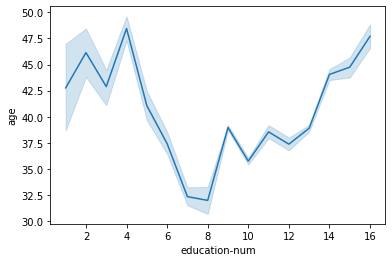

In [33]:
# positively skewed data

# Bivariate analysis
sns.lineplot(x="education-num", y="age", data=df)

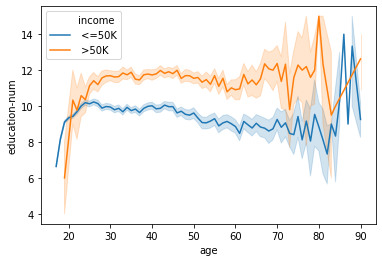

In [34]:
sns.lineplot(x="age", y="education-num", hue='income', data=df)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

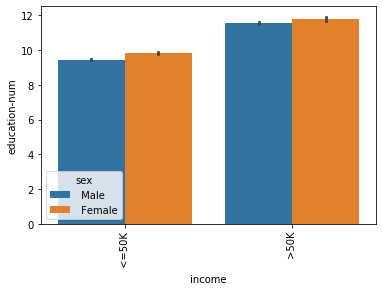

In [38]:
sns.barplot(x="income", y="education-num", hue='sex', data=df)
plt.xticks(rotation=90)

In [39]:
# mjority are earning ess than 50k irrespective of gender

(array([0, 1]), <a list of 2 Text xticklabel objects>)

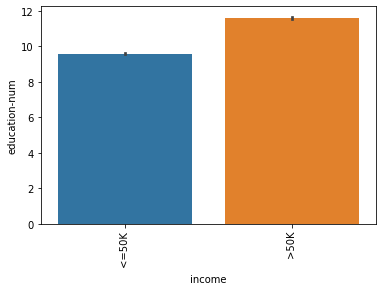

In [41]:
sns.barplot(x="income", y="education-num", data=df)
plt.xticks(rotation=90)

In [ ]:
# education num doesnot play important role in earning s people with high education earning less than 50k

In [8]:
# lets seperate Target and rest
x=df.drop(columns='income')
y=df['income']

In [9]:
x.shape,y.shape


((32561, 14), (32561,))

In [10]:

# Lets check skewness
x.skew()

age               0.558743
fnlwgt            1.446980
education-num    -0.311676
capital-gain      3.096144
capital-loss      4.307537
hours-per-week    0.227643
dtype: float64

In [11]:
# positive skewness needs to be treated
df['capital-gain']=np.log1p(df['capital-gain'])


In [12]:
df['capital-loss']=np.log1p(df['capital-loss'])

In [13]:
x.skew()

age               0.558743
fnlwgt            1.446980
education-num    -0.311676
capital-gain      3.096144
capital-loss      4.307537
hours-per-week    0.227643
dtype: float64

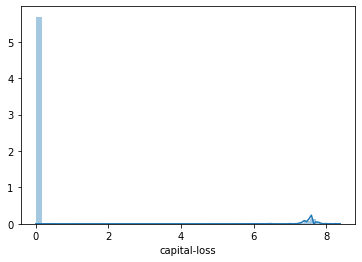

In [14]:
sns.distplot(x['capital-loss'])

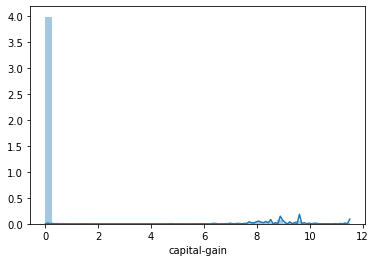

In [15]:
sns.distplot(x['capital-gain'])

In [16]:
x=pd.get_dummies(x)

In [17]:
x.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)

In [18]:
# scaling input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
# Finding Best model
lg=LogisticRegression()
max_accuracy_score=0

In [22]:
# Finding best r_state
def maxr2_score(lg,x,y):
    max_accuracy_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lg.fit(x_train,y_train)
        pred=lg.predict(x_test)
        ac_scr=accuracy_score(y_test,pred)
        print('accuracy score corresponding to random state',r_state," is ",ac_scr)
        if ac_scr>max_accuracy_score:
            max_accuracy_score=ac_scr
            final_r_state=r_state
    print('max accuracy score corresponding to ', final_r_state," is ",max_accuracy_score)
    return final_r_state

In [23]:
# Lets use LogisticRegression
r_state=maxr2_score(lg,x,y)

accuracy score corresponding to random state 42  is  0.852141870105942
accuracy score corresponding to random state 43  is  0.8475356978350991
accuracy score corresponding to random state 44  is  0.8412405957316137
accuracy score corresponding to random state 45  is  0.8464609243052357
accuracy score corresponding to random state 46  is  0.8464609243052357
accuracy score corresponding to random state 47  is  0.8470750806080147
accuracy score corresponding to random state 48  is  0.8510670965760786
accuracy score corresponding to random state 49  is  0.8461538461538461
accuracy score corresponding to random state 50  is  0.8535237217871948
accuracy score corresponding to random state 51  is  0.8472286196837095
accuracy score corresponding to random state 52  is  0.8350990327038231
accuracy score corresponding to random state 53  is  0.8387839705204975
accuracy score corresponding to random state 54  is  0.8455396898510671
accuracy score corresponding to random state 55  is  0.8429295255

In [62]:
# To find optimum value of n_neighbours for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsClassifier()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 20}

In [24]:
# Lets use KNN regression model
knr=KNeighborsClassifier(n_neighbors=20)
r_state=maxr2_score(knr,x,y)

accuracy score corresponding to random state 42  is  0.8343313373253493
accuracy score corresponding to random state 43  is  0.8278826961461692
accuracy score corresponding to random state 44  is  0.8315676339628435
accuracy score corresponding to random state 45  is  0.831260555811454
accuracy score corresponding to random state 46  is  0.8340242591739597
accuracy score corresponding to random state 47  is  0.833256563795486
accuracy score corresponding to random state 48  is  0.8389375095961922
accuracy score corresponding to random state 49  is  0.8283433133732535
accuracy score corresponding to random state 50  is  0.844925533548288
accuracy score corresponding to random state 51  is  0.826040227237832
accuracy score corresponding to random state 52  is  0.8235836020267158
accuracy score corresponding to random state 53  is  0.8238906801781053
accuracy score corresponding to random state 54  is  0.8274220789190849
accuracy score corresponding to random state 55  is  0.8248119146322

In [ ]:
# we will use gradient boosting Technique
# for getting best prameters will use grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

In [46]:
gcr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gcr,x,y)

accuracy score corresponding to random state 42  is  0.8809523809523809
accuracy score corresponding to random state 43  is  0.8299319727891157
accuracy score corresponding to random state 44  is  0.8673469387755102
accuracy score corresponding to random state 45  is  0.8537414965986394
accuracy score corresponding to random state 46  is  0.8435374149659864
accuracy score corresponding to random state 47  is  0.8605442176870748
accuracy score corresponding to random state 48  is  0.8809523809523809
accuracy score corresponding to random state 49  is  0.8673469387755102
accuracy score corresponding to random state 50  is  0.8401360544217688
accuracy score corresponding to random state 51  is  0.8843537414965986
accuracy score corresponding to random state 52  is  0.8979591836734694
accuracy score corresponding to random state 53  is  0.8639455782312925
accuracy score corresponding to random state 54  is  0.8639455782312925
accuracy score corresponding to random state 55  is  0.867346938

In [47]:
SV=SVC()
DT=DecisionTreeClassifier()
GNB=GaussianNB()

In [50]:
# Use adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_cls=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],'base_estimator':[DecisionTreeClassifier()]}
clf=GridSearchCV(ada_cls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 100}

In [55]:
ada_cls=AdaBoostClassifier(base_estimator=DT,learning_rate=1,n_estimators=100)
r_state=maxr2_score(ada_cls,x,y)

accuracy score corresponding to random state 42  is  0.7619047619047619
accuracy score corresponding to random state 43  is  0.7448979591836735
accuracy score corresponding to random state 44  is  0.7551020408163265
accuracy score corresponding to random state 45  is  0.782312925170068
accuracy score corresponding to random state 46  is  0.7789115646258503
accuracy score corresponding to random state 47  is  0.7993197278911565
accuracy score corresponding to random state 48  is  0.7585034013605442
accuracy score corresponding to random state 49  is  0.7653061224489796
accuracy score corresponding to random state 50  is  0.7619047619047619
accuracy score corresponding to random state 51  is  0.7721088435374149
accuracy score corresponding to random state 52  is  0.7857142857142857
accuracy score corresponding to random state 53  is  0.8095238095238095
accuracy score corresponding to random state 54  is  0.7755102040816326
accuracy score corresponding to random state 55  is  0.8163265306

In [ ]:
# Logistice regression is the best model

In [ ]:
#Logistic Regression model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
acc_log=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

In [ ]:
lg_score=cross_val_score(lg,x_train,y_train,cv=5).mean()
lg_score

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(lg,"income_predict.pkl")

In [ ]:
a=[pred,y_test]

In [ ]:
a